In [1]:
!pip install mtcnn

In [15]:
import tensorflow
from tensorflow.keras.models import load_model

In [2]:
import mtcnn
mtcnn.__version__

'0.1.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [6]:
from keras.applications import VGG16
model = VGG16()

553467904/553467096 [==============================] - 48s 0us/step


In [7]:
!where python

C:\Users\User.QATAR-SS-10\anaconda3\python.exe
C:\Users\User.QATAR-SS-10\AppData\Local\Microsoft\WindowsApps\python.exe


In [17]:
from tensorflow.keras.models import load_model
model = load_model('facenet_keras.h5')
# model.inputs, model.outputs

ValueError: bad marshal data (unknown type code)

In [18]:
!pip install facenet-pytorch

In [20]:
!git clone https://github.com/timesler/facenet-pytorch.git facenet_pytorch

Cloning into 'facenet_pytorch'...


In [21]:
from facenet_pytorch import MTCNN, InceptionResnetV1

In [27]:
mtcnn = MTCNN(image_size=(128, 128), margin=(2, 2))
resnet = InceptionResnetV1(pretrained='vggface2').eval()

In [33]:
import cv2

Shape of image/array: (450, 830, 4)


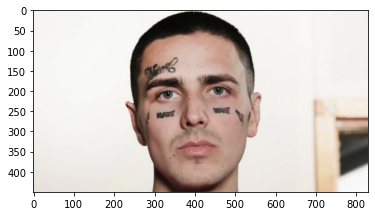

In [40]:
import matplotlib.pyplot as plt
# load image from file
filename = "0b7967d40cd7.png"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

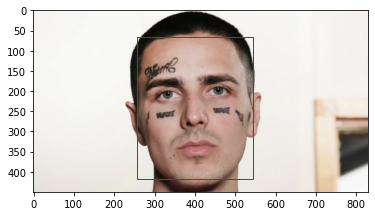

In [47]:
import mtcnn
def draw_facebox(filename, result_list):
    data = plt.imread(filename)
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
        ax.add_patch(rect)
    plt.show()
# pixels = plt.imread(filename) # defined above, otherwise uncomment
pixels = cv2.cvtColor(cv2.imread("0b7967d40cd7.png"), cv2.COLOR_BGR2RGB)
plt.imshow(pixels)
detector = mtcnn.MTCNN()
faces = detector.detect_faces(pixels)
draw_facebox(filename, faces)

In [82]:
import mtcnn
def get_face(filename):
    pixels = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    detector = mtcnn.MTCNN()
    faces = detector.detect_faces(pixels)
    res = []
    for result in faces:
        X, Y, W, H = result['box']
        res.append(img[Y:Y+H, X:X+W])
    return faces

# plt.imshow(get_face("0b7967d40cd7.png")[0])

In [126]:
minsize = 20
threshold = [0.6, 0.8, 0.9]
factor = 0.709
margin = 0
input_image_size = 160

def prewhiten(x):
    mean = np.mean(x)
    std = np.std(x)
    std_adj = np.maximum(std, 1.0/np.sqrt(x.size))
    y = np.multiply(np.subtract(x, mean), 1/std_adj)
    return y

def getEmbedding(resized):
    reshaped = resized.reshape(-1,input_image_size,input_image_size,3)
    feed_dict = {images_placeholder: reshaped, phase_train_placeholder: False}
    embedding = sess.run(embeddings, feed_dict=feed_dict)
    return embedding

def getFace(filename):
    pixels = cv2.cvtColor(cv2.imread(filename), cv2.COLOR_BGR2RGB)
    detector = mtcnn.MTCNN()
    img_size = np.asarray(pixels.shape)[0:2]
    faces = detector.detect_faces(pixels)
    res = []
    for result in faces:
        print(result)
        X, Y, W, H = result['box']
        det = np.squeeze(result['box'][0:4])
        bb = np.zeros(4, dtype=np.int32)
        bb[0] = np.maximum(det[0] - margin / 2, 0)
        bb[1] = np.maximum(det[1] - margin / 2, 0)
        bb[2] = np.minimum(det[2] + margin / 2, img_size[1])
        bb[3] = np.minimum(det[3] + margin / 2, img_size[0])
        cropped = pixels[Y:Y+H, X:X+W]
        resized = cv2.resize(cropped, (input_image_size,input_image_size),interpolation=cv2.INTER_CUBIC)
        prewhitened = prewhiten(resized)
        res.append({'face':resized,'rect':[bb[0],bb[1],bb[2],bb[3]],'embedding':getEmbedding(prewhitened)})
    return res

def compare(img1, img2):
    face1 = getFace(img1)
    face2 = getFace(img2)
    print(face1)
    if face1 and face2:
        # calculate Euclidean distance
        dist = np.sqrt(np.sum(np.square(np.subtract(face1[0]['embedding'], face2[0]['embedding']))))
        return dist
    return -1

In [127]:
img1 = cv2.imread('0b7967d40cd7.png')
img2 = cv2.imread('103365582_263829501621991_3156102800746389445_n-e1608646444196-640x546.jpg')
distance = compare('0b7967d40cd7.png', '103365582_263829501621991_3156102800746389445_n-e1608646444196-640x546.jpg')
threshold = 1.10    # set yourself to meet your requirement
plt.imshow(img1)
plt.imshow(img2)
print("distance = "+str(distance))
print("Result = " + ("same person" if distance <= threshold else "not same person"))

{'box': [257, 65, 288, 353], 'confidence': 0.999987006187439, 'keypoints': {'left_eye': (329, 222), 'right_eye': (461, 213), 'nose': (395, 265), 'mouth_left': (352, 350), 'mouth_right': (452, 342)}}


NameError: name 'images_placeholder' is not defined

In [32]:
from PIL import Image
img = Image.open('0b7967d40cd7.png', save_path="kekw.png")
img_cropped = mtcnn(img)
img_embedding = resnet(img_cropped.unsqueeze(0))
resnet.classify = True
img_probs = resnet(img_cropped.unsqueeze(0))

TypeError: open() got an unexpected keyword argument 'save_path'

In [26]:
img_cropped

NameError: name 'img_cropped' is not defined

In [12]:
import sys

print(sys.executable)

C:\Users\User.QATAR-SS-10\anaconda3\python.exe


In [19]:
!pip list

Package                            Version
---------------------------------- -------------------
absl-py                            0.13.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 2.0.3
anaconda-project                   0.9.1
anyio                              2.2.0
appdirs                            1.4.4
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.5
astropy                            4.2.1
astunparse                         1.6.3
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.6
Babel                              2.9.0
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0


In [3]:
image = Image.open(filename)
image = image.convert('RGB')
pixels = asarray(image)
image = Image.open(filename)
image = image.convert('RGB')
pixels = asarray(image)
pixels

NameError: name 'Image' is not defined

In [13]:
tf.version.VERSION

'2.5.0'